In [3]:
print("hello world")

hello world


In [4]:
import pandas

In [5]:
import numpy

In [6]:
import os

In [7]:
path=os.path.join("Titanic","Titanic.csv")
data=pandas.read_csv(path)

In [8]:
data.shape

(891, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Business Understanding
#### Business Question
- penumpang seperti apa yang seharusnya memiliki peluang besar untuk selamat dalam kejadian tenggelamnya kapal titanic?
#### Hypothesis
- pihak kepolisian ingin mengetahui penumpang mana saja yang seharusnya mempunyai peluang besar untuk selamat dalam kejadian tenggelamnya kapal titanic berdasarkan data penumpang yang selamat dan meninggal, sehingga data ini dapat dipelajari oleh pihak dermaga untuk meminimalisir korban bencana tenggelamnya kapal dikemudian hari
#### Expected Output
- mengetahui penumpang seperti apa yang seharusnya memiliki peluang besar untuk selamat dalam kejadian tenggelamnya kapal titanic?
#### Experimentation Plan
- mengukur persentase data penumpang yang meninggal dan membandingkannya dengan data penumpang yang selamat

# Data Understanding
- PassengerId : Id dari records/penumpang
- Survived : Catatan bahwa dia selamat atau meninggal (1=Selamat, 0=Meninggal)
- Pclass : Kelas dari penumpang
- Name : Nama penumpang
- Sex : Jenis Kelamin penumpang
- Age : Usia penumpang
- SibSp : Jumlah Siblings/Spouse (saudara atau pasangan)
- Parch : Jumlah Parent/Childern (Orang tua atau anak)
- Ticket : Nomor Tiket
- Fare : Harga Tiket
- Cabin : Posisi duduk/kabin penumpang
- Embarked : Pelabuhan tempat penumpang berangkat

# Data Preparation

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# change null to 'tidak diketahui'
data['Age']=data['Age'].fillna('tidak diketahui')

In [13]:
data['Age'].unique()

array([22.0, 38.0, 26.0, 35.0, 'tidak diketahui', 54.0, 2.0, 27.0, 14.0,
       4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0,
       40.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5,
       5.0, 11.0, 45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0,
       24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0,
       36.5, 51.0, 55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5,
       20.5, 62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0,
       13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5,
       0.42, 34.5, 74.0], dtype=object)

In [14]:
data['Cabin']=data['Cabin'].fillna('tidak diketahui')

In [15]:
data['Embarked']=data['Embarked'].fillna('tidak diketahui')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [39]:
# checking duplicated
data.loc[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,tidak diketahui,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,tidak diketahui,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,tidak diketahui,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,tidak diketahui,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,tidak diketahui,1,2,W./C. 6607,23.4500,tidak diketahui,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
# drop column not needed
DataFix=data.drop(columns=['PassengerId','SibSp','Parch','Ticket'],axis=1)

In [42]:
DataFix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    object 
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 55.8+ KB


In [43]:
DataFix

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,tidak diketahui,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,tidak diketahui,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,tidak diketahui,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,tidak diketahui,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,tidak diketahui,23.4500,tidak diketahui,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C


In [44]:
for i in range (891):
    if DataFix.loc[i,'Age']=='tidak diketahui':
        DataFix.loc[i,'Age']=0.0

In [45]:
DataFix['Age'].unique()

array([22.0, 38.0, 26.0, 35.0, 0.0, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0,
       20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 66.0,
       42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0,
       45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0, 24.0, 46.0,
       59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0, 36.5, 51.0,
       55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5, 20.5, 62.0,
       41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0, 13.0, 48.0,
       0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5, 0.42, 34.5,
       74.0], dtype=object)

In [46]:
for i in range (891):
    if (float(DataFix.loc[i,'Age'])<18.0 and float(DataFix.loc[i,'Age'])>0.0) and DataFix.loc[i,'Survived']==1:
        DataFix.loc[i,'Anak (1)']=1
    elif (float(DataFix.loc[i,'Age'])<18.0 and float(DataFix.loc[i,'Age'])>0.0) and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Anak (0)']=1
    elif (float(DataFix.loc[i,'Age'])>18.0 and float(DataFix.loc[i,'Age'])<23.0) and DataFix.loc[i,'Survived']==1:
        DataFix.loc[i,'Remaja (1)']=1
    elif (float(DataFix.loc[i,'Age'])>18.0 and float(DataFix.loc[i,'Age'])<23.0) and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Remaja (0)']=1
    elif (float(DataFix.loc[i,'Age'])>23.0 and float(DataFix.loc[i,'Age'])<50.0) and DataFix.loc[i,'Survived']==1:
        DataFix.loc[i,'Dewasa (1)']=1
    elif (float(DataFix.loc[i,'Age'])>23.0 and float(DataFix.loc[i,'Age'])<50.0) and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Dewasa (0)']=1
    elif float(DataFix.loc[i,'Age'])>50.0 and DataFix.loc[i,'Survived']==1:
        DataFix.loc[i,'Lansia (1)']=1
    elif float(DataFix.loc[i,'Age'])>50.0 and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Lansia (0)']=1

In [47]:
DataFix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    object 
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    object 
 7   Embarked    891 non-null    object 
 8   Remaja (0)  64 non-null     float64
 9   Dewasa (1)  160 non-null    float64
 10  Dewasa (0)  234 non-null    float64
 11  Lansia (0)  42 non-null     float64
 12  Anak (0)    52 non-null     float64
 13  Anak (1)    61 non-null     float64
 14  Lansia (1)  22 non-null     float64
 15  Remaja (1)  28 non-null     float64
dtypes: float64(9), int64(2), object(5)
memory usage: 111.5+ KB


In [48]:
DataFix['Anak (0)']=DataFix['Anak (0)'].fillna(0.0)
DataFix['Anak (1)']=DataFix['Anak (1)'].fillna(0.0)
DataFix['Remaja (0)']=DataFix['Remaja (0)'].fillna(0.0)
DataFix['Remaja (1)']=DataFix['Remaja (1)'].fillna(0.0)
DataFix['Dewasa (0)']=DataFix['Dewasa (0)'].fillna(0.0)
DataFix['Dewasa (1)']=DataFix['Dewasa (1)'].fillna(0.0)
DataFix['Lansia (0)']=DataFix['Lansia (0)'].fillna(0.0)
DataFix['Lansia (1)']=DataFix['Lansia (1)'].fillna(0.0)

In [49]:
DataFix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    object 
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    object 
 7   Embarked    891 non-null    object 
 8   Remaja (0)  891 non-null    float64
 9   Dewasa (1)  891 non-null    float64
 10  Dewasa (0)  891 non-null    float64
 11  Lansia (0)  891 non-null    float64
 12  Anak (0)    891 non-null    float64
 13  Anak (1)    891 non-null    float64
 14  Lansia (1)  891 non-null    float64
 15  Remaja (1)  891 non-null    float64
dtypes: float64(9), int64(2), object(5)
memory usage: 111.5+ KB


In [63]:
DataFix

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Remaja (0),Dewasa (1),Dewasa (0),Lansia (0),Anak (0),Anak (1),Lansia (1),Remaja (1)
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,tidak diketahui,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,tidak diketahui,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,tidak diketahui,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,tidak diketahui,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,23.4500,tidak diketahui,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Data Survived by Age
ExData={
    'Total Anak Selamat':[DataFix['Anak (1)'].sum()],
    'Total Anak Meninggal':[DataFix['Anak (0)'].sum()],
    'Total Remaja Selamat':[DataFix['Remaja (1)'].sum()],
    'Total Remaja Meninggal':[DataFix['Remaja (0)'].sum()],
    'Total Dewasa Selamat':[DataFix['Dewasa (1)'].sum()],
    'Total Dewasa Meninggal':[DataFix['Dewasa (0)'].sum()],
    'Total Lansia Selamat':[DataFix['Lansia (1)'].sum()],
    'Total Lansia Meninggal':[DataFix['Lansia (0)'].sum()]
}

DataSurvivedByAge=pandas.DataFrame(ExData)

In [75]:
DataSurvivedByAge

,Total Anak Selamat,Total Anak Meninggal,Total Remaja Selamat,Total Remaja Meninggal,Total Dewasa Selamat,Total Dewasa Meninggal,Total Lansia Selamat,Total Lansia Meninggal
0,61.0,52.0,28.0,64.0,160.0,234.0,22.0,42.0


In [76]:
import matplotlib.pyplot as plt

In [163]:
# Comparison Data Anak
anakselamat=DataSurvivedByAge['Total Anak Selamat']
anakmeninggal=DataSurvivedByAge['Total Anak Meninggal']

In [164]:
# Comparison Data Remaja
remajaselamat=DataSurvivedByAge['Total Remaja Selamat']
remajameninggal=DataSurvivedByAge['Total Remaja Meninggal']

In [165]:
# Comparison Data Dewasa
dewasaselamat=DataSurvivedByAge['Total Dewasa Selamat']
dewasameninggal=DataSurvivedByAge['Total Dewasa Meninggal']

In [166]:
# Comparison Data Lansia
lansiaselamat=DataSurvivedByAge['Total Lansia Selamat']
lansiameninggal=DataSurvivedByAge['Total Lansia Meninggal']

In [84]:
DataFix=DataFix[['Survived','Name','Age','Sex','Pclass','Fare','Cabin','Embarked','Anak (0)','Anak (1)','Remaja (0)','Remaja (1)','Dewasa (0)','Dewasa (1)','Lansia (0)','Lansia (1)']]
DataFix

,Survived,Name,Age,Sex,Pclass,Fare,Cabin,Embarked,Anak (0),Anak (1),Remaja (0),Remaja (1),Dewasa (0),Dewasa (1),Lansia (0),Lansia (1)
0,0,"Braund, Mr. Owen Harris",22.0,male,3,7.2500,tidak diketahui,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,71.2833,C85,C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,"Heikkinen, Miss. Laina",26.0,female,3,7.9250,tidak diketahui,S,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,53.1000,C123,S,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,"Allen, Mr. William Henry",35.0,male,3,8.0500,tidak diketahui,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.0,male,2,13.0000,tidak diketahui,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
887,1,"Graham, Miss. Margaret Edith",19.0,female,1,30.0000,B42,S,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,female,3,23.4500,tidak diketahui,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1,"Behr, Mr. Karl Howell",26.0,male,1,30.0000,C148,C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
for i in range (891):
    if DataFix.loc[i,'Sex']=='male' and DataFix.loc[i,'Survived']==1:
        DataFix.loc[i,'Pria (1)']=1
    elif DataFix.loc[i,'Sex']=='male' and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Pria (0)']=1
    elif DataFix.loc[i,'Sex']=='female' and DataFix.loc[i,'Survived']==1:
        DataFix.loc[i,'Wanita (1)']=1
    elif DataFix.loc[i,'Sex']=='female' and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Wanita (0)']=1

In [90]:
DataFix['Pria (1)']=DataFix['Pria (1)'].fillna(0.0)
DataFix['Pria (0)']=DataFix['Pria (0)'].fillna(0.0)
DataFix['Wanita (1)']=DataFix['Wanita (1)'].fillna(0.0)
DataFix['Wanita (0)']=DataFix['Wanita (0)'].fillna(0.0)

In [91]:
# Data Survived by Sex
ExData={
    'Total Pria Selamat':[DataFix['Pria (1)'].sum()],
    'Total Pria Meninggal':[DataFix['Pria (0)'].sum()],
    'Total Wanita Selamat':[DataFix['Wanita (1)'].sum()],
    'Total Wanita Meninggal':[DataFix['Wanita (0)'].sum()]
}

DataSurvivedBySex=pandas.DataFrame(ExData)

In [167]:
# Comparison Data Pria
priaselamat=DataSurvivedBySex['Total Pria Selamat']
priameninggal=DataSurvivedBySex['Total Pria Meninggal']

In [168]:
# Comparison Data Wanita
wanitaselamat=DataSurvivedBySex['Total Wanita Selamat']
wanitameninggal=DataSurvivedBySex['Total Wanita Meninggal']

In [94]:
DataFix

,Survived,Name,Age,Sex,Pclass,Fare,Cabin,Embarked,Anak (0),Anak (1),Remaja (0),Remaja (1),Dewasa (0),Dewasa (1),Lansia (0),Lansia (1),Pria (0),Wanita (1),Wanita (0),Pria (1)
0,0,"Braund, Mr. Owen Harris",22.0,male,3,7.2500,tidak diketahui,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,71.2833,C85,C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,"Heikkinen, Miss. Laina",26.0,female,3,7.9250,tidak diketahui,S,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,53.1000,C123,S,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,"Allen, Mr. William Henry",35.0,male,3,8.0500,tidak diketahui,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.0,male,2,13.0000,tidak diketahui,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
887,1,"Graham, Miss. Margaret Edith",19.0,female,1,30.0000,B42,S,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,female,3,23.4500,tidak diketahui,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1,"Behr, Mr. Karl Howell",26.0,male,1,30.0000,C148,C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
DataFix['Embarked'].unique()

array(['S', 'C', 'Q', 'tidak diketahui'], dtype=object)

In [99]:
DataFix['Fare'] = DataFix['Fare'].astype("int")

In [101]:
del DataFix['Fare']

In [103]:
DataFix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Name        891 non-null    object 
 2   Age         891 non-null    object 
 3   Sex         891 non-null    object 
 4   Pclass      891 non-null    int64  
 5   Cabin       891 non-null    object 
 6   Embarked    891 non-null    object 
 7   Anak (0)    891 non-null    float64
 8   Anak (1)    891 non-null    float64
 9   Remaja (0)  891 non-null    float64
 10  Remaja (1)  891 non-null    float64
 11  Dewasa (0)  891 non-null    float64
 12  Dewasa (1)  891 non-null    float64
 13  Lansia (0)  891 non-null    float64
 14  Lansia (1)  891 non-null    float64
 15  Pria (0)    891 non-null    float64
 16  Wanita (1)  891 non-null    float64
 17  Wanita (0)  891 non-null    float64
 18  Pria (1)    891 non-null    float64
dtypes: float64(12), int64(2), obj

In [104]:
for i in range (891):
    if DataFix.loc[i,'Pclass']==1 and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Class 1 (meninggal)']=1
    elif DataFix.loc[i,'Pclass']==2 and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Class 2 (meninggal)']=1
    elif DataFix.loc[i,'Pclass']==3 and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Class 3 (meninggal)']=1

In [106]:
DataFix['Class 1 (meninggal)']=DataFix['Class 1 (meninggal)'].fillna(0.0)
DataFix['Class 2 (meninggal)']=DataFix['Class 2 (meninggal)'].fillna(0.0)
DataFix['Class 3 (meninggal)']=DataFix['Class 3 (meninggal)'].fillna(0.0)

In [110]:
# Data Survived (meninggal) by Pclass
ExData={
    'Persentase meninggal Pclass 1':[DataFix['Class 1 (meninggal)'].sum()],
    'Persentase meninggal Pclass 2':[DataFix['Class 2 (meninggal)'].sum()],
    'Persentase meninggal Pclass 3':[DataFix['Class 3 (meninggal)'].sum()]
}

DataMeninggalByPclass=pandas.DataFrame(ExData)

In [169]:
# Comparison Data Meninggal Pclass
TotalMeninggal=DataMeninggalByPclass['Persentase meninggal Pclass 1']+DataMeninggalByPclass['Persentase meninggal Pclass 2']+DataMeninggalByPclass['Persentase meninggal Pclass 3']
meninggal1=(DataMeninggalByPclass['Persentase meninggal Pclass 1']/TotalMeninggal)*100
meninggal2=(DataMeninggalByPclass['Persentase meninggal Pclass 2']/TotalMeninggal)*100
meninggal3=(DataMeninggalByPclass['Persentase meninggal Pclass 3']/TotalMeninggal)*100

In [136]:
del DataFix['Cabin']

In [148]:
DataFix['Embarked'].unique()

array(['S', 'C', 'Q', 'tidak diketahui'], dtype=object)

In [149]:
for i in range (891):
    if DataFix.loc[i,'Embarked']=='S' and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'S (meninggal)']=1
    elif DataFix.loc[i,'Embarked']=='C' and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'C (meninggal)']=1
    elif DataFix.loc[i,'Embarked']=='Q' and DataFix.loc[i,'Survived']==0:
        DataFix.loc[i,'Q (meninggal)']=1

In [150]:
DataFix['S (meninggal)']=DataFix['S (meninggal)'].fillna(0.0)
DataFix['C (meninggal)']=DataFix['C (meninggal)'].fillna(0.0)
DataFix['Q (meninggal)']=DataFix['Q (meninggal)'].fillna(0.0)

In [152]:
# Data Survived (meninggal) on Embarked
ExData={
    'Persentase meninggal S':[DataFix['S (meninggal)'].sum()],
    'Persentase meninggal C':[DataFix['C (meninggal)'].sum()],
    'Persentase meninggal Q':[DataFix['Q (meninggal)'].sum()]
}

DataMeninggalOnEmbarked=pandas.DataFrame(ExData)
DataMeninggalOnEmbarked

,Persentase meninggal S,Persentase meninggal C,Persentase meninggal Q
0,427.0,75.0,47.0


In [170]:
# Comparison Data Meninggal Embarked
TotalMeninggal=DataMeninggalOnEmbarked['Persentase meninggal S']+DataMeninggalOnEmbarked['Persentase meninggal C']+DataMeninggalOnEmbarked['Persentase meninggal Q']
meninggal1_1=(DataMeninggalOnEmbarked['Persentase meninggal S']/TotalMeninggal)*100
meninggal2_2=(DataMeninggalOnEmbarked['Persentase meninggal C']/TotalMeninggal)*100
meninggal3_3=(DataMeninggalOnEmbarked['Persentase meninggal Q']/TotalMeninggal)*100

# Data Preparation (Conclusion)

In [154]:
# Fix Data
DataFix

,Survived,Name,Age,Sex,Pclass,Embarked,Anak (0),Anak (1),Remaja (0),Remaja (1),...,Wanita (1),Wanita (0),Pria (1),Class 3 (meninggal),Class 1 (meninggal),Class 2 (meninggal),S (meninggal),Belum Diketahui,Q (meninggal),C (meninggal)
0,0,"Braund, Mr. Owen Harris",22.0,male,3,S,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,C,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,"Heikkinen, Miss. Laina",26.0,female,3,S,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,S,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,"Allen, Mr. William Henry",35.0,male,3,S,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.0,male,2,S,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
887,1,"Graham, Miss. Margaret Edith",19.0,female,1,S,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,female,3,S,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
889,1,"Behr, Mr. Karl Howell",26.0,male,1,C,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<BarContainer object of 2 artists>

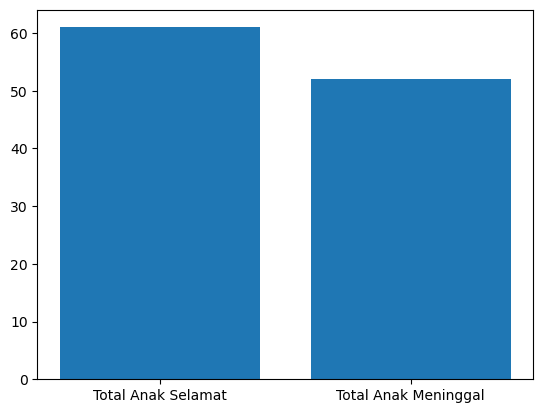

In [171]:
plt.bar(['Total Anak Selamat','Total Anak Meninggal'],[int(anakselamat),int(anakmeninggal)])

<BarContainer object of 2 artists>

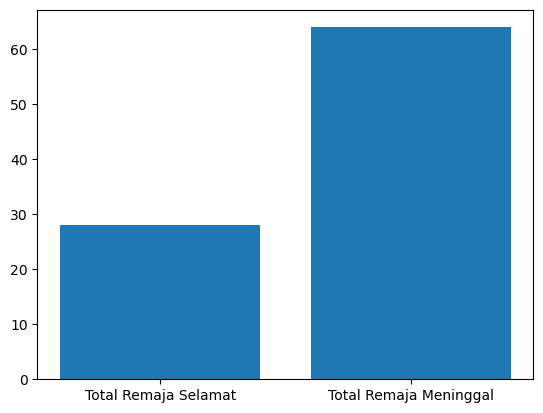

In [172]:
plt.bar(['Total Remaja Selamat','Total Remaja Meninggal'],[int(remajaselamat),int(remajameninggal)])

<BarContainer object of 2 artists>

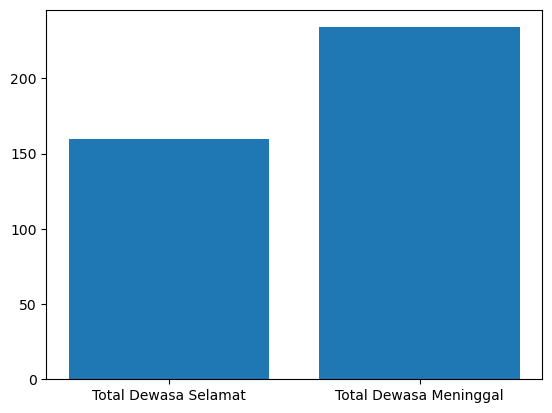

In [173]:
plt.bar(['Total Dewasa Selamat','Total Dewasa Meninggal'],[int(dewasaselamat),int(dewasameninggal)])

<BarContainer object of 2 artists>

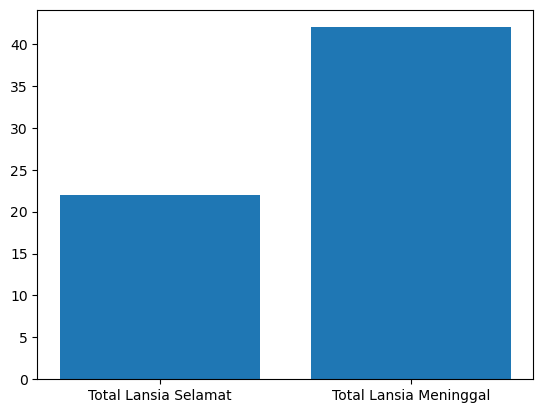

In [174]:
plt.bar(['Total Lansia Selamat','Total Lansia Meninggal'],[int(lansiaselamat),int(lansiameninggal)])

<BarContainer object of 2 artists>

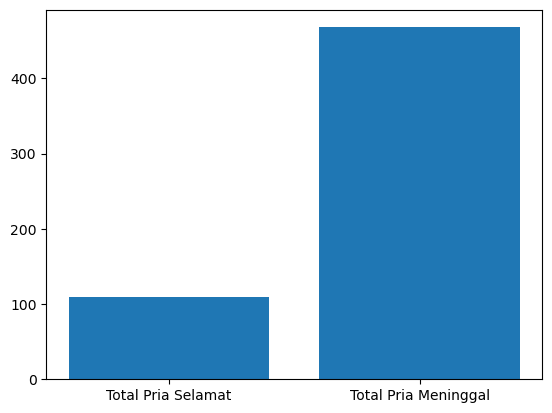

In [175]:
plt.bar(['Total Pria Selamat','Total Pria Meninggal'],[int(priaselamat),int(priameninggal)])

<BarContainer object of 2 artists>

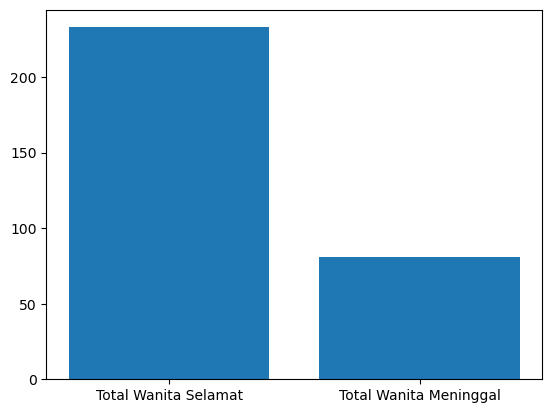

In [176]:
plt.bar(['Total Wanita Selamat','Total Wanita Meninggal'],[int(wanitaselamat),int(wanitameninggal)])

<BarContainer object of 3 artists>

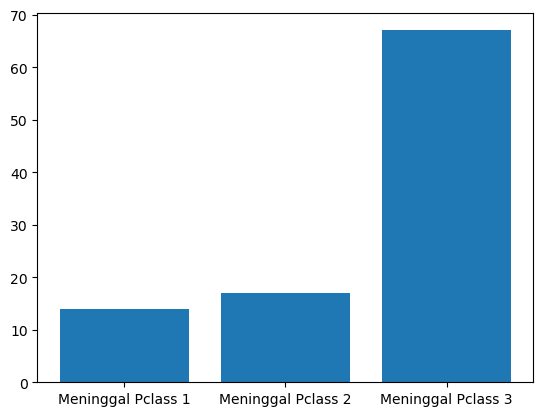

In [179]:
plt.bar(['Meninggal Pclass 1','Meninggal Pclass 2','Meninggal Pclass 3'],[int(meninggal1),int(meninggal2),int(meninggal3)])

<BarContainer object of 3 artists>

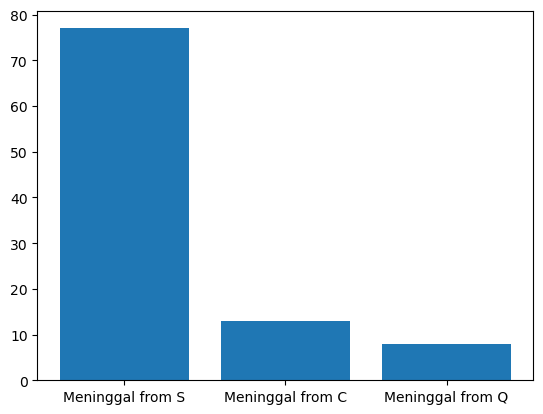

In [181]:
plt.bar(['Meninggal from S','Meninggal from C','Meninggal from Q'],[int(meninggal1_1),int(meninggal2_2),int(meninggal3_3)])

# Modelling